# 1. 导入模块和库

In [1]:
import time
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

E:\Anaconda\envs\DL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. 导入数据

In [2]:
data = pd.read_csv(r"F:\Code_Data\2_Rocks_Spectrum_Reflectance_essay_30_origin_modify_2.csv",encoding='utf-8') #encoding='GBK',防止中文乱码

In [3]:
data.head()

,Wavelength,350,351,352,353,354,355,356,357,358,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,label
0,spectrum16307.asd,0.204522,0.199451,0.203168,0.204193,0.207148,0.211029,0.209031,0.211301,0.212234,...,0.153147,0.152505,0.151796,0.153219,0.152015,0.148442,0.146025,0.146183,0.150323,01_辉绿岩
1,spectrum16308.asd,0.194000,0.190182,0.187659,0.192645,0.195336,0.195043,0.199864,0.199332,0.196149,...,0.148415,0.150101,0.151252,0.152308,0.151914,0.149478,0.147266,0.147974,0.148874,01_辉绿岩
2,spectrum16309.asd,0.188737,0.188014,0.194839,0.195826,0.193223,0.191428,0.194870,0.200086,0.201505,...,0.152087,0.150865,0.149892,0.146863,0.145949,0.146377,0.145230,0.145935,0.145221,01_辉绿岩
3,spectrum16310.asd,0.186729,0.188622,0.192174,0.198071,0.197598,0.192575,0.194385,0.199621,0.202134,...,0.144318,0.147365,0.149190,0.154470,0.155516,0.150827,0.152752,0.153995,0.152274,01_辉绿岩
4,spectrum16311.asd,0.202369,0.202873,0.201777,0.200011,0.200382,0.201807,0.200001,0.201517,0.202995,...,0.142018,0.145246,0.145941,0.146944,0.147167,0.144547,0.143343,0.143553,0.144721,01_辉绿岩


In [4]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [5]:
X.shape, y.shape

((11828, 2151), (11828,))

In [6]:
X.head()

,350,351,352,353,354,355,356,357,358,359,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.204522,0.199451,0.203168,0.204193,0.207148,0.211029,0.209031,0.211301,0.212234,0.209025,...,0.154455,0.153147,0.152505,0.151796,0.153219,0.152015,0.148442,0.146025,0.146183,0.150323
1,0.194000,0.190182,0.187659,0.192645,0.195336,0.195043,0.199864,0.199332,0.196149,0.194168,...,0.148189,0.148415,0.150101,0.151252,0.152308,0.151914,0.149478,0.147266,0.147974,0.148874
2,0.188737,0.188014,0.194839,0.195826,0.193223,0.191428,0.194870,0.200086,0.201505,0.197780,...,0.151407,0.152087,0.150865,0.149892,0.146863,0.145949,0.146377,0.145230,0.145935,0.145221
3,0.186729,0.188622,0.192174,0.198071,0.197598,0.192575,0.194385,0.199621,0.202134,0.199318,...,0.144722,0.144318,0.147365,0.149190,0.154470,0.155516,0.150827,0.152752,0.153995,0.152274
4,0.202369,0.202873,0.201777,0.200011,0.200382,0.201807,0.200001,0.201517,0.202995,0.202905,...,0.140991,0.142018,0.145246,0.145941,0.146944,0.147167,0.144547,0.143343,0.143553,0.144721


# 3. 数据预处理

In [8]:
# SG（Savitzky-Golay）平滑处理
# 输入信号 y，窗口大小 window_length，多项式阶数 polyorder
X_SG = savgol_filter(X, 5, 2)
X_SG_std = StandardScaler().fit_transform(X_SG) 
Label = LabelEncoder().fit_transform(y)

In [9]:
[*zip(np.unique(Label),LabelEncoder().fit(y).classes_)]

[(0, '01_辉绿岩'),
 (1, '02_斜长岩'),
 (2, '03_正长岩'),
 (3, '05_辉石闪长岩'),
 (4, '07_花岗斑岩'),
 (5, '09_橄榄岩'),
 (6, '10_闪长玢岩'),
 (7, '11_粗粒花岗岩'),
 (8, '12_斑状花岗岩'),
 (9, '13_斜长花岗岩'),
 (10, '17_角砾凝灰岩'),
 (11, '26_紫色页岩'),
 (12, '28_炭质页岩'),
 (13, '31_泥质灰岩'),
 (14, '33_泥晶石灰岩'),
 (15, '37_石英砾岩'),
 (16, '38_复成份砾岩'),
 (17, '41_石英砂岩'),
 (18, '42_细砂岩'),
 (19, '43_高岭石粘土岩'),
 (20, '44_蒙脱石粘土岩'),
 (21, '45_伊利石粘土岩'),
 (22, '49_石英岩②'),
 (23, '51_云英岩'),
 (24, '55_粗晶大理岩'),
 (25, '56_雪白大理岩'),
 (26, '58_花岗片麻岩'),
 (27, '59_绿泥石片岩'),
 (28, '60_含榴白云母片岩'),
 (29, '63_云母石英片岩'),
 (30, '64_十字石片岩'),
 (31, '66_蛇纹岩'),
 (32, '67_石榴子石矽卡岩')]

In [10]:
#让特征和标签等于我们运行出来的结果
data.iloc[:,1:-1] = X_SG_std
data.iloc[:, -1] = Label
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

# 4. PCA 降维

#### （1）画累计方差贡献率曲线，找最佳降维后维度的范围

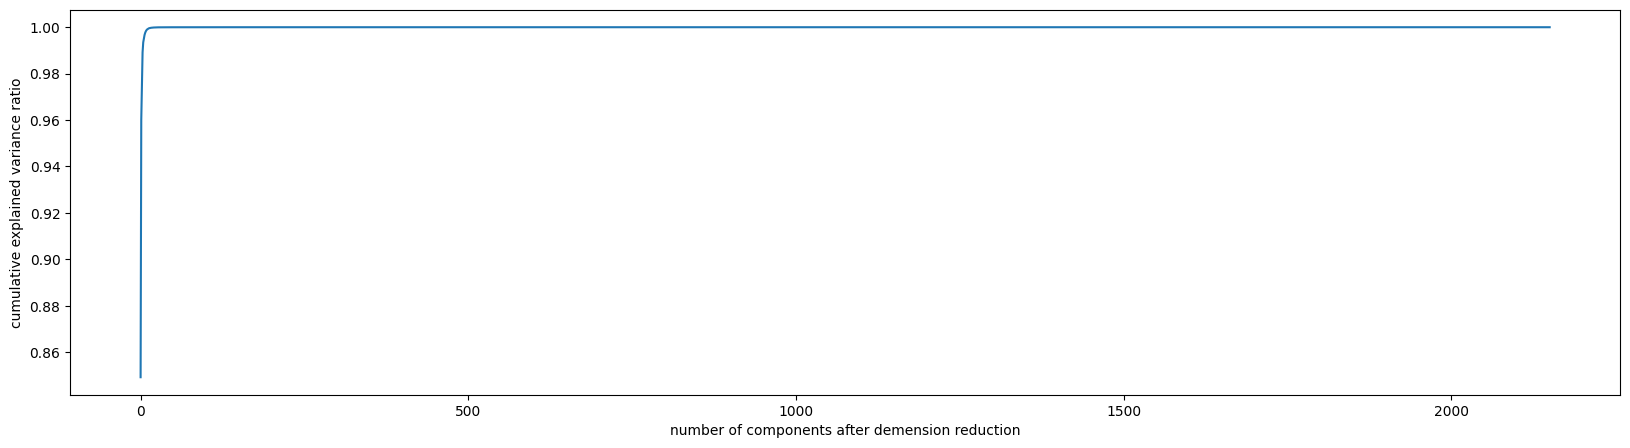

In [17]:
pca_line = PCA().fit(X) #n_components默认取值min(X.shape)=2151
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after demension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

#### （2）降维后维度的学习曲线，继续缩小最佳维度的范围

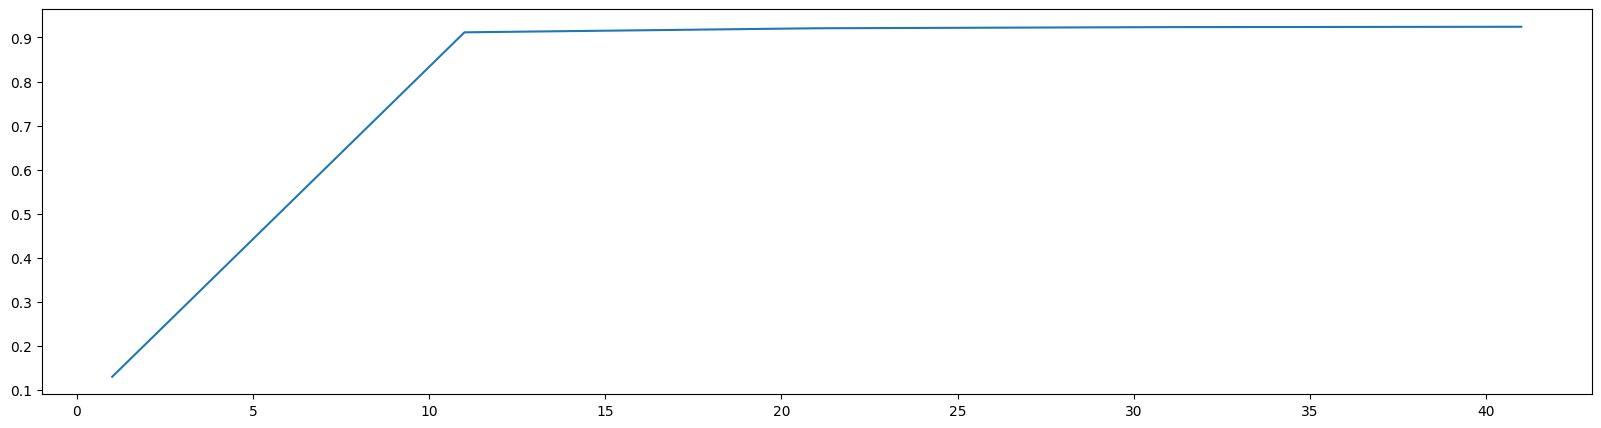

In [18]:
score = []
for i in range(1,51,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,51,10),score)
plt.show()

#### （3）细化学习曲线，找出降维后的最佳维度

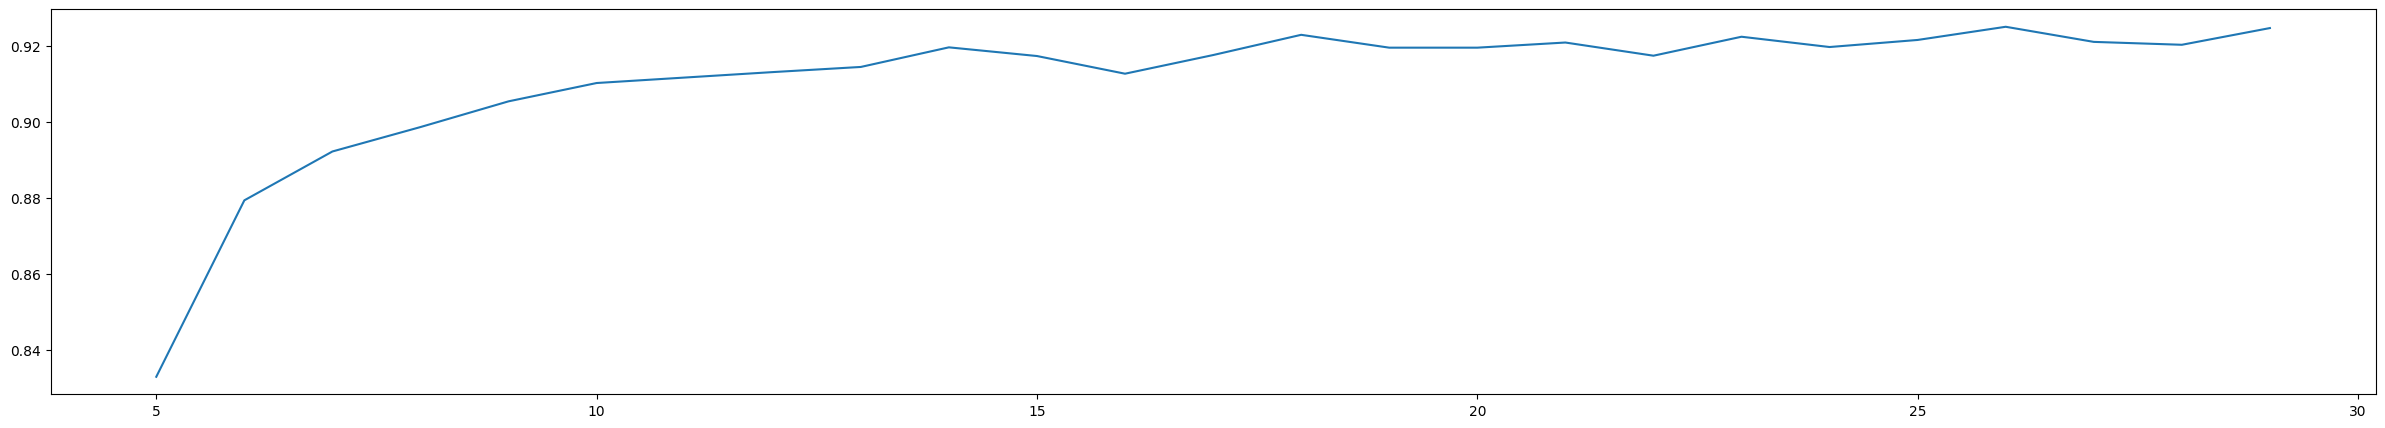

In [19]:
score = []
for i in range(5,30):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[30,5])
plt.plot(range(5,30),score)
plt.show()

In [20]:
print(max(score),range(5,30)[score.index(max(score))])

0.9250072646494829 26


#### （4）导入找出的最佳维度进行降维，利用交叉验证查看模型效果

In [11]:
X_dr = PCA(26).fit_transform(X)

In [12]:
cv = KFold(n_splits=5,shuffle=True,random_state=0)

rfc = RFC(n_estimators=100,random_state=0)

score_original = cross_val_score(rfc,X_dr,y
                        ,scoring='accuracy'
                        ,cv=cv #交叉验证模式
                        ,verbose=False #是否打印进程
                        ,n_jobs=-1 #线程数
                        ,error_score='raise' #如果在某个折叠中出现错误，会引发一个异常
                       ).mean()
score_original

0.9637301160378083

# 5. 建模，训练，查看结果

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dr, y, test_size=0.3, random_state=0)

In [27]:
rfc = RFC(n_estimators=100,random_state=0)
rfc = rfc.fit(X_train, Y_train)
score_r = rfc.score(X_test, Y_test)
print("Random Forest:{}".format(score_r))

Random Forest:0.9644970414201184


In [28]:
# 保存混淆矩阵
pred = rfc.predict(X_test)
cm = confusion_matrix(Y_test, pred)
output_folder = 'F:/Jupyter_Notebook_file/01_Spectrum Recognition/模型评价指标'
csv_filename = 'cm_test.csv'
np.savetxt(f'{output_folder}/{csv_filename}', cm, delimiter=',', fmt='%d')

In [98]:
rfc.predict(X_test) #predict返回每个测试样本的分类/回归结果

array([ 6, 24, 13, ..., 20, 14, 32])

In [139]:
rfc.predict(X_test).shape #3330/10998=0.4，符合测试集划分的比例

(3549,)

In [100]:
rfc.predict_proba(X_test) #这个接口返回每个测试样本对应的被分到每一类标签的概率，标签有几个分类就返回几个概率

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.1, 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [101]:
rfc.score(X_train,Y_train), rfc.score(X_test,Y_test)

(0.9993960623263679, 0.9935193012116089)

# 6. 手动调参（Manual Hyperparameter Tuning）学习曲线+网格搜索

先利用学习曲线找出最佳的n_estimators值，然后基于模型的泛化误差理论，利用网格搜索寻找使得泛化误差最低的参数设置

#### （1）调整 n_estimators 

n_estimators的学习曲线

0.9878766505617957 191


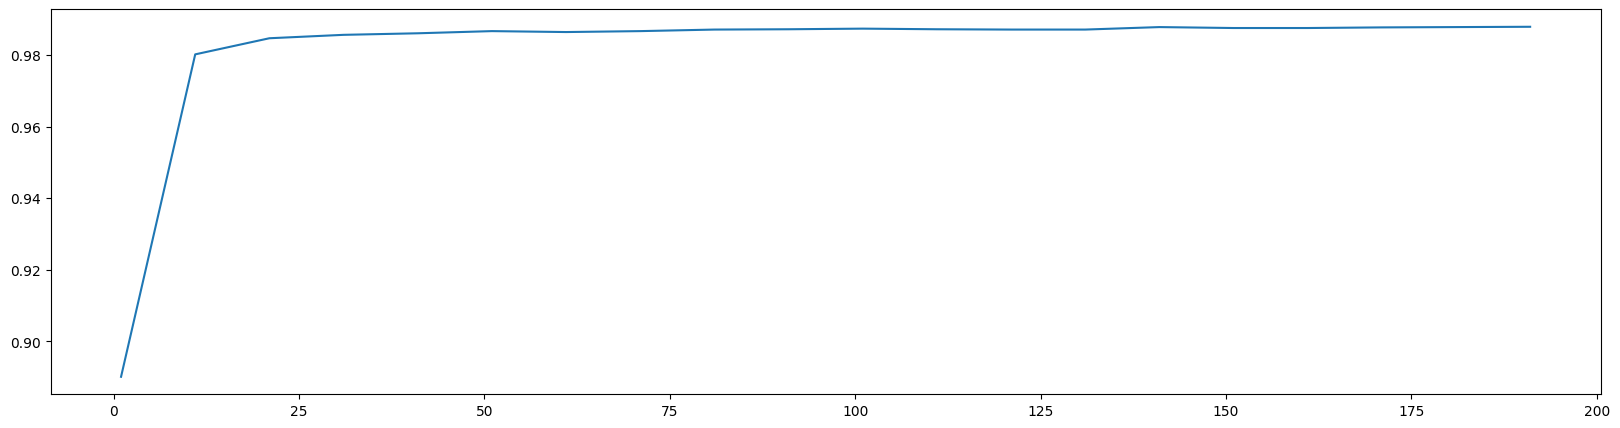

In [31]:
scorel = []
for i in range(0,200,10):
    rfc = RFC(n_estimators=i+1
              ,n_jobs=-1
              ,random_state=0)
    score = cross_val_score(rfc, X_dr, y, cv=5).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

在确定好的范围内，进一步细化学习曲线

In [ ]:
scorel = []
for i in range(185,195):
    rfc = RFC(n_estimators=i
              ,n_jobs=-1
              ,random_state=0)
    score = cross_val_score(rfc, X_dr, y, cv=5).mean()
    scorel.append(score)
print(max(scorel),([*range(185,195)][scorel.index(max(scorel))]))
plt.figure(figsize=[10,5])
plt.plot(range(185,195),scorel)
plt.show()

#### （2）调整max_depth

In [54]:
param_grid = {'max_depth':np.arange(30,50,1)}
rfc = RFC(n_estimators=194
          ,random_state=0
         )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_dr,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=194, random_state=0),
             param_grid={'max_depth': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49])})

In [55]:
GS.best_params_

{'max_depth': 30}

In [57]:
GS.best_score_

0.9880498107349558

In [61]:
#max_depth返回最小值，准确率无变化，不需要调整
#因为max_depth，min_samples_leaf和min_samples_split是剪枝参数，是减小复杂度的参数，进一步调整可能会导致模型泛化误差增大
#我们已经非常接近模型的上限，模型很可能没有办法再进步了
#此时我们的模型泛化误差处于最低点的左侧
#那我们这就来调整一下max_features，看看模型如何变化

#### （3）调整min_samples_leaf

In [ ]:
param_grid={'min_samples_leaf':np.arange(1, 1+50, 1)}
rfc = RFC(n_estimators=194
          ,random_state=0
         )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_dr,y)

In [ ]:
GS.best_params_

In [ ]:
GS.best_score_

#### （4）调整min_samples_split

In [ ]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RFC(n_estimators=194
                            ,random_state=0
                            )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_dr,y)

In [ ]:
GS.best_params_

In [ ]:
GS.best_score_

#### （5）调整max_features

In [63]:
param_grid = {'max_features':np.arange(5,30,1)} #取最小（sqrt(n_features)）到最大特征数
rfc = RFC(n_estimators=194
          ,random_state=0
         )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_dr,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=194, random_state=0),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [64]:
GS.best_params_

{'max_features': 5}

In [65]:
GS.best_score_

0.9880498107349558

#### （6）调整criterion

In [66]:
param_grid = {'criterion':['gini', 'entropy']}
rfc = RFC(n_estimators=194
          ,random_state=0
         )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X_dr,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=194, random_state=0),
             param_grid={'criterion': ['gini', 'entropy']})

In [67]:
GS.best_params_

{'criterion': 'entropy'}

In [68]:
GS.best_score_

0.9892623444117596

#### （7）调整完毕，总结出模型的最佳参数

In [32]:
cv = KFold(n_splits=5,shuffle=True,random_state=0)

rfc = RFC(n_estimators=100
          ,criterion='entropy'
          ,random_state=0
         )

score_MHT = cross_val_score(rfc,X_dr,y
                        ,scoring='accuracy'
                        ,cv=cv #交叉验证模式
                        ,verbose=False #是否打印进程
                        ,n_jobs=-1 #线程数
                        ,error_score='raise' #如果在某个折叠中出现错误，会引发一个异常
                       ).mean()
score_MHT

0.9983546408838743

# 7. Optuna——随机网格搜索，调参

#### （1）构建目标函数及定义参数空间

In [23]:
def optuna_objective(trial):

    #定义参数空间
    n_estimators = trial.suggest_int("n_estimators",50,150,1) #整数型，(参数名称，下界，上界，步长)
    max_depth = trial.suggest_int("max_depth",30,50,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_samples_leaf = trial.suggest_int("min_samples_leaf",1,51,1)
    min_samples_split = trial.suggest_int("min_samples_split",2,22,1)

    #定义评估器
    #需要优化的参数由上述参数空间决定
    #不需要优化的参数则直接填写具体值
    rfc = RFC(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_samples_leaf = min_samples_leaf
              ,min_samples_split = min_samples_split
              ,random_state=0
              ,verbose=False
              ,n_jobs=-1
             )

    #交叉验证过程，输出准确率(accuracy)
    cv = KFold(n_splits=5,shuffle=True,random_state=0)
    score = cross_val_score(rfc,X_dr,y
                            ,scoring='accuracy'
                            ,cv=cv #交叉验证模式
                            ,verbose=False #是否打印进程
                            ,n_jobs=-1 #线程数
                            ,error_score='raise' #如果在某个折叠中出现错误，会引发一个异常
                           )
    #最终输出平均准确率
    return np.mean(score)

#### （2）定义优化目标函数的具体流程

In [24]:
def optimizer_optuna(n_trials, algo):

    #定义使用随机网格搜索
    sampler = optuna.samplers.RandomSampler(seed=0)

    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = sampler #要使用的具体算法
                                ,direction="maximize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   ,n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   ,show_progress_bar=True #要不要展示进度条呀？
                  )

    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")

    return study.best_trial.params, study.best_trial.values

#### （3）执行优化操作

In [25]:
def optimized_optuna_search_and_report(n_trials, algo):
    start_time = time.time()

    # 进行随机网格搜索优化
    best_params, best_score = optimizer_optuna(n_trials, algo)

    # 打印最佳参数和分数
    print("\n","\n","best params: ", best_params,
          "\n","\n","best score: ", best_score,
          "\n")

    end_time = time.time()
    time_random = (end_time - start_time) / 60  # 转换为分钟
    print(f"Optimization completed in {time_random} minutes.")

    return best_params, best_score, time_random

# 执行优化
best_params, best_score, time_random = optimized_optuna_search_and_report(30, "Random")

[I 2023-08-29 21:34:26,764] A new study created in memory with name: no-name-c317eb00-81c5-4ba2-9471-a05264785807
Best trial: 0. Best value: 0.940142:   3%|█▌                                            | 1/30 [01:26<42:02, 87.00s/it]

[I 2023-08-29 21:35:53,975] Trial 0 finished with value: 0.9401420761706987 and parameters: {'n_estimators': 105, 'max_depth': 45, 'max_features': 20, 'min_samples_leaf': 28, 'min_samples_split': 10}. Best is trial 0 with value: 0.9401420761706987.


Best trial: 0. Best value: 0.940142:   7%|███                                           | 2/30 [03:15<46:24, 99.44s/it]

[I 2023-08-29 21:37:42,132] Trial 1 finished with value: 0.9147781020410717 and parameters: {'n_estimators': 115, 'max_depth': 39, 'max_features': 28, 'min_samples_leaf': 50, 'min_samples_split': 10}. Best is trial 0 with value: 0.9401420761706987.


Best trial: 0. Best value: 0.940142:  10%|████▌                                         | 3/30 [04:45<42:54, 95.37s/it]

[I 2023-08-29 21:39:12,645] Trial 2 finished with value: 0.9303346027854078 and parameters: {'n_estimators': 129, 'max_depth': 41, 'max_features': 19, 'min_samples_leaf': 48, 'min_samples_split': 3}. Best is trial 0 with value: 0.9401420761706987.


Best trial: 0. Best value: 0.940142:  13%|██████▏                                       | 4/30 [05:43<34:51, 80.46s/it]

[I 2023-08-29 21:40:10,244] Trial 3 finished with value: 0.9193435902201555 and parameters: {'n_estimators': 58, 'max_depth': 30, 'max_features': 26, 'min_samples_leaf': 40, 'min_samples_split': 20}. Best is trial 0 with value: 0.9401420761706987.


Best trial: 0. Best value: 0.940142:  17%|███████▋                                      | 5/30 [07:10<34:31, 82.86s/it]

[I 2023-08-29 21:41:37,374] Trial 4 finished with value: 0.937605256997028 and parameters: {'n_estimators': 148, 'max_depth': 46, 'max_features': 16, 'min_samples_leaf': 40, 'min_samples_split': 4}. Best is trial 0 with value: 0.9401420761706987.


Best trial: 0. Best value: 0.940142:  20%|█████████▏                                    | 6/30 [09:05<37:29, 93.74s/it]

[I 2023-08-29 21:43:32,224] Trial 5 finished with value: 0.929320053828104 and parameters: {'n_estimators': 114, 'max_depth': 33, 'max_features': 29, 'min_samples_leaf': 27, 'min_samples_split': 10}. Best is trial 0 with value: 0.9401420761706987.


Best trial: 6. Best value: 0.945891:  23%|██████████▋                                   | 7/30 [09:51<29:59, 78.22s/it]

[I 2023-08-29 21:44:18,488] Trial 6 finished with value: 0.945891103529744 and parameters: {'n_estimators': 76, 'max_depth': 46, 'max_features': 16, 'min_samples_leaf': 29, 'min_samples_split': 2}. Best is trial 6 with value: 0.945891103529744.


Best trial: 6. Best value: 0.945891:  27%|████████████▎                                 | 8/30 [11:16<29:28, 80.39s/it]

[I 2023-08-29 21:45:43,533] Trial 7 finished with value: 0.9252618222564555 and parameters: {'n_estimators': 112, 'max_depth': 42, 'max_features': 21, 'min_samples_leaf': 49, 'min_samples_split': 16}. Best is trial 6 with value: 0.945891103529744.


Best trial: 8. Best value: 0.955614:  30%|█████████████▊                                | 9/30 [12:52<29:51, 85.32s/it]

[I 2023-08-29 21:47:19,703] Trial 8 finished with value: 0.9556136171520787 and parameters: {'n_estimators': 86, 'max_depth': 39, 'max_features': 23, 'min_samples_leaf': 4, 'min_samples_split': 16}. Best is trial 8 with value: 0.9556136171520787.


Best trial: 9. Best value: 0.957643:  33%|███████████████                              | 10/30 [13:31<23:39, 70.99s/it]

[I 2023-08-29 21:47:58,601] Trial 9 finished with value: 0.9576429295212838 and parameters: {'n_estimators': 117, 'max_depth': 34, 'max_features': 8, 'min_samples_leaf': 17, 'min_samples_split': 9}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  37%|████████████████▌                            | 11/30 [15:39<28:01, 88.48s/it]

[I 2023-08-29 21:50:06,747] Trial 10 finished with value: 0.9548526607560597 and parameters: {'n_estimators': 107, 'max_depth': 39, 'max_features': 30, 'min_samples_leaf': 6, 'min_samples_split': 6}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  40%|██████████████████                           | 12/30 [16:08<21:05, 70.30s/it]

[I 2023-08-29 21:50:35,454] Trial 11 finished with value: 0.9535000956110078 and parameters: {'n_estimators': 66, 'max_depth': 43, 'max_features': 11, 'min_samples_leaf': 24, 'min_samples_split': 7}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  43%|███████████████████▌                         | 13/30 [17:15<19:37, 69.28s/it]

[I 2023-08-29 21:51:42,380] Trial 12 finished with value: 0.9546836705334021 and parameters: {'n_estimators': 66, 'max_depth': 32, 'max_features': 22, 'min_samples_leaf': 8, 'min_samples_split': 6}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  47%|█████████████████████                        | 14/30 [17:36<14:36, 54.81s/it]

[I 2023-08-29 21:52:03,748] Trial 13 finished with value: 0.9519783257887016 and parameters: {'n_estimators': 87, 'max_depth': 47, 'max_features': 7, 'min_samples_leaf': 43, 'min_samples_split': 4}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  50%|██████████████████████▌                      | 15/30 [20:14<21:29, 85.94s/it]

[I 2023-08-29 21:54:41,853] Trial 14 finished with value: 0.9266992041947318 and parameters: {'n_estimators': 148, 'max_depth': 39, 'max_features': 30, 'min_samples_leaf': 31, 'min_samples_split': 17}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  53%|████████████████████████                     | 16/30 [20:34<15:21, 65.84s/it]

[I 2023-08-29 21:55:01,006] Trial 15 finished with value: 0.9569665397214593 and parameters: {'n_estimators': 53, 'max_depth': 35, 'max_features': 8, 'min_samples_leaf': 16, 'min_samples_split': 4}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  57%|█████████████████████████▌                   | 17/30 [20:53<11:13, 51.77s/it]

[I 2023-08-29 21:55:20,066] Trial 16 finished with value: 0.9554448413840184 and parameters: {'n_estimators': 82, 'max_depth': 38, 'max_features': 6, 'min_samples_leaf': 36, 'min_samples_split': 13}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  60%|███████████████████████████                  | 18/30 [21:13<08:29, 42.47s/it]

[I 2023-08-29 21:55:40,895] Trial 17 finished with value: 0.9562901141792018 and parameters: {'n_estimators': 76, 'max_depth': 40, 'max_features': 7, 'min_samples_leaf': 30, 'min_samples_split': 21}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  63%|████████████████████████████▌                | 19/30 [21:37<06:43, 36.71s/it]

[I 2023-08-29 21:56:04,183] Trial 18 finished with value: 0.953246503049723 and parameters: {'n_estimators': 82, 'max_depth': 44, 'max_features': 8, 'min_samples_leaf': 37, 'min_samples_split': 8}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  67%|██████████████████████████████               | 20/30 [21:48<04:51, 29.15s/it]

[I 2023-08-29 21:56:15,711] Trial 19 finished with value: 0.9553601675605254 and parameters: {'n_estimators': 68, 'max_depth': 42, 'max_features': 5, 'min_samples_leaf': 43, 'min_samples_split': 2}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  70%|███████████████████████████████▍             | 21/30 [23:31<07:42, 51.37s/it]

[I 2023-08-29 21:57:58,894] Trial 20 finished with value: 0.9180753414742682 and parameters: {'n_estimators': 118, 'max_depth': 35, 'max_features': 24, 'min_samples_leaf': 50, 'min_samples_split': 7}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  73%|█████████████████████████████████            | 22/30 [25:01<08:23, 62.96s/it]

[I 2023-08-29 21:59:28,888] Trial 21 finished with value: 0.9534998811564106 and parameters: {'n_estimators': 108, 'max_depth': 42, 'max_features': 19, 'min_samples_leaf': 12, 'min_samples_split': 22}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  77%|██████████████████████████████████▌          | 23/30 [26:30<08:14, 70.68s/it]

[I 2023-08-29 22:00:57,577] Trial 22 finished with value: 0.9465672788749713 and parameters: {'n_estimators': 95, 'max_depth': 47, 'max_features': 23, 'min_samples_leaf': 16, 'min_samples_split': 19}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  80%|████████████████████████████████████         | 24/30 [27:35<06:54, 69.06s/it]

[I 2023-08-29 22:02:02,840] Trial 23 finished with value: 0.9280520910216795 and parameters: {'n_estimators': 90, 'max_depth': 48, 'max_features': 20, 'min_samples_leaf': 45, 'min_samples_split': 16}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  83%|█████████████████████████████████████▌       | 25/30 [29:39<07:06, 85.37s/it]

[I 2023-08-29 22:04:06,275] Trial 24 finished with value: 0.923655378610656 and parameters: {'n_estimators': 123, 'max_depth': 40, 'max_features': 29, 'min_samples_leaf': 33, 'min_samples_split': 10}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 9. Best value: 0.957643:  87%|███████████████████████████████████████      | 26/30 [30:28<04:58, 74.67s/it]

[I 2023-08-29 22:04:55,973] Trial 25 finished with value: 0.9506256176739182 and parameters: {'n_estimators': 111, 'max_depth': 30, 'max_features': 12, 'min_samples_leaf': 34, 'min_samples_split': 8}. Best is trial 9 with value: 0.9576429295212838.


Best trial: 26. Best value: 0.957728:  90%|███████████████████████████████████████▌    | 27/30 [31:04<03:08, 62.78s/it]

[I 2023-08-29 22:05:31,022] Trial 26 finished with value: 0.9577275318599112 and parameters: {'n_estimators': 112, 'max_depth': 39, 'max_features': 8, 'min_samples_leaf': 16, 'min_samples_split': 13}. Best is trial 26 with value: 0.9577275318599112.


Best trial: 26. Best value: 0.957728:  93%|█████████████████████████████████████████   | 28/30 [32:31<02:20, 70.13s/it]

[I 2023-08-29 22:06:58,304] Trial 27 finished with value: 0.9321942458257307 and parameters: {'n_estimators': 109, 'max_depth': 42, 'max_features': 21, 'min_samples_leaf': 34, 'min_samples_split': 11}. Best is trial 26 with value: 0.9577275318599112.


Best trial: 26. Best value: 0.957728:  97%|██████████████████████████████████████████▌ | 29/30 [33:51<01:13, 73.24s/it]

[I 2023-08-29 22:08:18,806] Trial 28 finished with value: 0.9348155601107301 and parameters: {'n_estimators': 140, 'max_depth': 37, 'max_features': 16, 'min_samples_leaf': 46, 'min_samples_split': 18}. Best is trial 26 with value: 0.9577275318599112.


Best trial: 26. Best value: 0.957728: 100%|████████████████████████████████████████████| 30/30 [35:50<00:00, 71.68s/it]

[I 2023-08-29 22:10:17,424] Trial 29 finished with value: 0.9214571117612262 and parameters: {'n_estimators': 121, 'max_depth': 32, 'max_features': 28, 'min_samples_leaf': 37, 'min_samples_split': 22}. Best is trial 26 with value: 0.9577275318599112.

 
 best params:  {'n_estimators': 112, 'max_depth': 39, 'max_features': 8, 'min_samples_leaf': 16, 'min_samples_split': 13} 
 
 best score:  [0.9577275318599112] 


 
 best params:  {'n_estimators': 112, 'max_depth': 39, 'max_features': 8, 'min_samples_leaf': 16, 'min_samples_split': 13} 
 
 best score:  [0.9577275318599112] 

Optimization completed in 35.84446833133698 minutes.


# 8. Optuna——贝叶斯优化，调参

#### （1）构建目标函数及定义参数空间

在Optuna中，不需要将参数或参数空间输入目标函数，而是需要直接在目标函数中定义参数空间。Optuna优化器会生成一个指代备选参数的变量trial，该变量无法被用户获取或打开，但该变量在优化器中生存，并被输入目标函数。在目标函数中，可以通过变量trail所携带的方法来构造参数空间

In [13]:
def optuna_objective(trial):

    #定义参数空间
    n_estimators = trial.suggest_int("n_estimators",50,150,1) #整数型，(参数名称，下界，上界，步长)
    max_depth = trial.suggest_int("max_depth",25,50,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_samples_leaf = trial.suggest_int("min_samples_leaf",1,51,1)
    min_samples_split = trial.suggest_int("min_samples_split",2,22,1)

    #定义评估器
    #需要优化的参数由上述参数空间决定
    #不需要优化的参数则直接填写具体值
    rfc = RFC(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_samples_leaf = min_samples_leaf
              ,min_samples_split = min_samples_split
              ,random_state=0
              ,verbose=False
              ,n_jobs=-1
             )

    #交叉验证过程，输出准确率(accuracy)
    cv = KFold(n_splits=5,shuffle=True,random_state=0)
    score = cross_val_score(rfc,X_dr,y
                            ,scoring='accuracy'
                            ,cv=cv #交叉验证模式
                            ,verbose=False #是否打印进程
                            ,n_jobs=-1 #线程数
                            ,error_score='raise' #如果在某个折叠中出现错误，会引发一个异常
                           )
    #最终输出平均准确率
    return np.mean(score)

#### （2）定义优化目标函数的具体流程

在Optuna的模块sampler可以定义备选的算法，包括我TPE优化、随机网格搜索以及其他各类更加高级的贝叶斯过程，对于Optuna.sampler中调出的类，可以直接输入参数来设置初始观测值的数量、以及每次计算采集函数时所考虑的观测值量。

In [14]:
def optimizer_optuna(n_trials, algo):

    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 15, n_ei_candidates = 12)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':30, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )

    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                ,direction="maximize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   ,n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   ,show_progress_bar=True #要不要展示进度条呀？
                  )

    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")

    return study.best_trial.params, study.best_trial.values

#### （3）执行优化操作

In [15]:
def optimized_optuna_search_and_report(n_trials, algo):
    start_time = time.time()

    # 进行贝叶斯优化
    best_params, best_score = optimizer_optuna(n_trials, algo)

    # 打印最佳参数和分数
    print("\n","\n","best params: ", best_params,
          "\n","\n","best score: ", best_score,
          "\n")

    end_time = time.time()
    time_bayes = (end_time - start_time) / 60  # 转换为分钟
    print(f"Optimization completed in {time_bayes} minutes.")

    return best_params, best_score, time_bayes

# 执行优化
best_params, best_score, time_bayes = optimized_optuna_search_and_report(30, "TPE")

[I 2023-08-30 10:40:42,656] A new study created in memory with name: no-name-fcc59fb6-7f88-46cb-9ca6-eaee1869e58f
Best trial: 0. Best value: 0.950795:   3%|█▍                                         | 1/30 [02:40<1:17:32, 160.45s/it]

[I 2023-08-30 10:43:23,100] Trial 0 finished with value: 0.9507946078965757 and parameters: {'n_estimators': 136, 'max_depth': 42, 'max_features': 28, 'min_samples_leaf': 7, 'min_samples_split': 22}. Best is trial 0 with value: 0.9507946078965757.


Best trial: 1. Best value: 0.955276:   7%|███                                           | 2/30 [03:14<40:03, 85.84s/it]

[I 2023-08-30 10:43:56,725] Trial 1 finished with value: 0.9552757081916295 and parameters: {'n_estimators': 106, 'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 32, 'min_samples_split': 10}. Best is trial 1 with value: 0.9552757081916295.


Best trial: 1. Best value: 0.955276:  10%|████▌                                        | 3/30 [05:22<47:28, 105.49s/it]

[I 2023-08-30 10:46:05,588] Trial 2 finished with value: 0.9237399809492832 and parameters: {'n_estimators': 116, 'max_depth': 40, 'max_features': 30, 'min_samples_leaf': 33, 'min_samples_split': 10}. Best is trial 1 with value: 0.9552757081916295.


Best trial: 1. Best value: 0.955276:  13%|██████▏                                       | 4/30 [06:53<43:13, 99.76s/it]

[I 2023-08-30 10:47:36,579] Trial 3 finished with value: 0.9275444769899153 and parameters: {'n_estimators': 130, 'max_depth': 30, 'max_features': 18, 'min_samples_leaf': 51, 'min_samples_split': 10}. Best is trial 1 with value: 0.9552757081916295.


Best trial: 1. Best value: 0.955276:  17%|███████▋                                      | 5/30 [08:15<38:47, 93.08s/it]

[I 2023-08-30 10:48:57,810] Trial 4 finished with value: 0.9151162969409838 and parameters: {'n_estimators': 78, 'max_depth': 28, 'max_features': 30, 'min_samples_leaf': 49, 'min_samples_split': 10}. Best is trial 1 with value: 0.9552757081916295.


Best trial: 1. Best value: 0.955276:  20%|█████████▏                                    | 6/30 [09:24<34:00, 85.02s/it]

[I 2023-08-30 10:50:07,178] Trial 5 finished with value: 0.9401418617161015 and parameters: {'n_estimators': 60, 'max_depth': 39, 'max_features': 30, 'min_samples_leaf': 18, 'min_samples_split': 15}. Best is trial 1 with value: 0.9552757081916295.


Best trial: 1. Best value: 0.955276:  23%|██████████▋                                   | 7/30 [10:57<33:35, 87.64s/it]

[I 2023-08-30 10:51:40,222] Trial 6 finished with value: 0.9533311053883503 and parameters: {'n_estimators': 146, 'max_depth': 46, 'max_features': 14, 'min_samples_leaf': 19, 'min_samples_split': 3}. Best is trial 1 with value: 0.9552757081916295.


Best trial: 7. Best value: 0.958488:  27%|████████████▎                                 | 8/30 [12:21<31:41, 86.42s/it]

[I 2023-08-30 10:53:04,039] Trial 7 finished with value: 0.9584883452861985 and parameters: {'n_estimators': 100, 'max_depth': 47, 'max_features': 17, 'min_samples_leaf': 5, 'min_samples_split': 13}. Best is trial 7 with value: 0.9584883452861985.


Best trial: 7. Best value: 0.958488:  30%|█████████████▊                                | 9/30 [13:07<25:51, 73.90s/it]

[I 2023-08-30 10:53:50,402] Trial 8 finished with value: 0.9410718440772108 and parameters: {'n_estimators': 91, 'max_depth': 48, 'max_features': 14, 'min_samples_leaf': 41, 'min_samples_split': 13}. Best is trial 7 with value: 0.9584883452861985.


Best trial: 7. Best value: 0.958488:  33%|███████████████                              | 10/30 [15:07<29:18, 87.91s/it]

[I 2023-08-30 10:55:49,699] Trial 9 finished with value: 0.9356610831029435 and parameters: {'n_estimators': 110, 'max_depth': 37, 'max_features': 27, 'min_samples_leaf': 22, 'min_samples_split': 7}. Best is trial 7 with value: 0.9584883452861985.


Best trial: 7. Best value: 0.958488:  37%|████████████████▌                            | 11/30 [15:44<22:55, 72.38s/it]

[I 2023-08-30 10:56:26,858] Trial 10 finished with value: 0.9489347861440883 and parameters: {'n_estimators': 61, 'max_depth': 40, 'max_features': 15, 'min_samples_leaf': 23, 'min_samples_split': 8}. Best is trial 7 with value: 0.9584883452861985.


Best trial: 7. Best value: 0.958488:  40%|██████████████████                           | 12/30 [16:52<21:17, 70.99s/it]

[I 2023-08-30 10:57:34,676] Trial 11 finished with value: 0.9213728668469277 and parameters: {'n_estimators': 69, 'max_depth': 50, 'max_features': 25, 'min_samples_leaf': 43, 'min_samples_split': 2}. Best is trial 7 with value: 0.9584883452861985.


Best trial: 12. Best value: 0.958742:  43%|███████████████████                         | 13/30 [18:55<24:36, 86.86s/it]

[I 2023-08-30 10:59:38,042] Trial 12 finished with value: 0.9587418306201847 and parameters: {'n_estimators': 116, 'max_depth': 28, 'max_features': 22, 'min_samples_leaf': 3, 'min_samples_split': 5}. Best is trial 12 with value: 0.9587418306201847.


Best trial: 12. Best value: 0.958742:  47%|████████████████████▌                       | 14/30 [19:25<18:36, 69.80s/it]

[I 2023-08-30 11:00:08,431] Trial 13 finished with value: 0.9507947151238744 and parameters: {'n_estimators': 79, 'max_depth': 48, 'max_features': 10, 'min_samples_leaf': 32, 'min_samples_split': 10}. Best is trial 12 with value: 0.9587418306201847.


Best trial: 12. Best value: 0.958742:  50%|██████████████████████                      | 15/30 [19:49<13:57, 55.83s/it]

[I 2023-08-30 11:00:31,892] Trial 14 finished with value: 0.9475823282263354 and parameters: {'n_estimators': 70, 'max_depth': 34, 'max_features': 9, 'min_samples_leaf': 45, 'min_samples_split': 5}. Best is trial 12 with value: 0.9587418306201847.


Best trial: 12. Best value: 0.958742:  53%|███████████████████████▍                    | 16/30 [20:37<12:31, 53.70s/it]

[I 2023-08-30 11:01:20,651] Trial 15 finished with value: 0.9445383239300948 and parameters: {'n_estimators': 80, 'max_depth': 42, 'max_features': 14, 'min_samples_leaf': 34, 'min_samples_split': 19}. Best is trial 12 with value: 0.9587418306201847.


Best trial: 12. Best value: 0.958742:  57%|████████████████████████▉                   | 17/30 [22:06<13:52, 64.06s/it]

[I 2023-08-30 11:02:48,806] Trial 16 finished with value: 0.9491036691394473 and parameters: {'n_estimators': 80, 'max_depth': 33, 'max_features': 30, 'min_samples_leaf': 10, 'min_samples_split': 18}. Best is trial 12 with value: 0.9587418306201847.


Best trial: 12. Best value: 0.958742:  60%|██████████████████████████▍                 | 18/30 [22:55<11:56, 59.67s/it]

[I 2023-08-30 11:03:38,264] Trial 17 finished with value: 0.9574739035561933 and parameters: {'n_estimators': 91, 'max_depth': 46, 'max_features': 13, 'min_samples_leaf': 11, 'min_samples_split': 9}. Best is trial 12 with value: 0.9587418306201847.


Best trial: 18. Best value: 0.961701:  63%|███████████████████████████▊                | 19/30 [23:40<10:08, 55.31s/it]

[I 2023-08-30 11:04:23,399] Trial 18 finished with value: 0.9617010896080664 and parameters: {'n_estimators': 121, 'max_depth': 34, 'max_features': 8, 'min_samples_leaf': 4, 'min_samples_split': 5}. Best is trial 18 with value: 0.9617010896080664.


Best trial: 18. Best value: 0.961701:  67%|█████████████████████████████▎              | 20/30 [25:18<11:20, 68.10s/it]

[I 2023-08-30 11:06:01,315] Trial 19 finished with value: 0.9338853275525907 and parameters: {'n_estimators': 130, 'max_depth': 40, 'max_features': 19, 'min_samples_leaf': 38, 'min_samples_split': 7}. Best is trial 18 with value: 0.9617010896080664.


Best trial: 20. Best value: 0.962546:  70%|██████████████████████████████▊             | 21/30 [25:43<08:16, 55.13s/it]

[I 2023-08-30 11:06:26,217] Trial 20 finished with value: 0.9625464696305484 and parameters: {'n_estimators': 112, 'max_depth': 25, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}. Best is trial 20 with value: 0.9625464696305484.


Best trial: 20. Best value: 0.962546:  73%|████████████████████████████████▎           | 22/30 [27:50<10:12, 76.53s/it]

[I 2023-08-30 11:08:32,661] Trial 21 finished with value: 0.9585726974277959 and parameters: {'n_estimators': 122, 'max_depth': 25, 'max_features': 22, 'min_samples_leaf': 3, 'min_samples_split': 4}. Best is trial 20 with value: 0.9625464696305484.


Best trial: 22. Best value: 0.963054:  77%|█████████████████████████████████▋          | 23/30 [28:23<07:25, 63.71s/it]

[I 2023-08-30 11:09:06,455] Trial 22 finished with value: 0.9630536904955509 and parameters: {'n_estimators': 113, 'max_depth': 25, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}. Best is trial 22 with value: 0.9630536904955509.


Best trial: 22. Best value: 0.963054:  80%|███████████████████████████████████▏        | 24/30 [28:50<05:15, 52.51s/it]

[I 2023-08-30 11:09:32,858] Trial 23 finished with value: 0.9604329838319104 and parameters: {'n_estimators': 122, 'max_depth': 27, 'max_features': 5, 'min_samples_leaf': 13, 'min_samples_split': 6}. Best is trial 22 with value: 0.9630536904955509.


Best trial: 22. Best value: 0.963054:  83%|████████████████████████████████████▋       | 25/30 [29:31<04:05, 49.16s/it]

[I 2023-08-30 11:10:14,188] Trial 24 finished with value: 0.9617009466383347 and parameters: {'n_estimators': 103, 'max_depth': 25, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}. Best is trial 22 with value: 0.9630536904955509.


Best trial: 22. Best value: 0.963054:  87%|██████████████████████████████████████▏     | 26/30 [29:59<02:51, 42.89s/it]

[I 2023-08-30 11:10:42,449] Trial 25 finished with value: 0.960940204696913 and parameters: {'n_estimators': 113, 'max_depth': 33, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 2}. Best is trial 22 with value: 0.9630536904955509.


Best trial: 22. Best value: 0.963054:  90%|███████████████████████████████████████▌    | 27/30 [30:41<02:07, 42.66s/it]

[I 2023-08-30 11:11:24,580] Trial 26 finished with value: 0.9573048061062372 and parameters: {'n_estimators': 95, 'max_depth': 32, 'max_features': 11, 'min_samples_leaf': 15, 'min_samples_split': 5}. Best is trial 22 with value: 0.9630536904955509.


Best trial: 27. Best value: 0.963392:  93%|█████████████████████████████████████████   | 28/30 [31:21<01:23, 41.85s/it]

[I 2023-08-30 11:12:04,535] Trial 27 finished with value: 0.9633919926227618 and parameters: {'n_estimators': 140, 'max_depth': 35, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}. Best is trial 27 with value: 0.9633919926227618.


Best trial: 28. Best value: 0.963476:  97%|██████████████████████████████████████████▌ | 29/30 [31:54<00:39, 39.18s/it]

[I 2023-08-30 11:12:37,488] Trial 28 finished with value: 0.9634764877340907 and parameters: {'n_estimators': 144, 'max_depth': 36, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 7}. Best is trial 28 with value: 0.9634764877340907.


Best trial: 28. Best value: 0.963476: 100%|████████████████████████████████████████████| 30/30 [32:36<00:00, 65.21s/it]

[I 2023-08-30 11:13:19,075] Trial 29 finished with value: 0.9595874250972642 and parameters: {'n_estimators': 144, 'max_depth': 36, 'max_features': 7, 'min_samples_leaf': 11, 'min_samples_split': 12}. Best is trial 28 with value: 0.9634764877340907.

 
 best params:  {'n_estimators': 144, 'max_depth': 36, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 7} 
 
 best score:  [0.9634764877340907] 


 
 best params:  {'n_estimators': 144, 'max_depth': 36, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 7} 
 
 best score:  [0.9634764877340907] 

Optimization completed in 32.607114692529045 minutes.


# 9. 最佳参数效果

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dr, y, test_size=0.3, random_state=0)

In [17]:
# 随机网格搜索最佳参数
rfc_1 = RFC(n_estimators=112
            ,max_depth=39
            ,max_features=8
            ,min_samples_leaf=16
            ,min_samples_split=13
            ,random_state=0
           )
rfc_1 = rfc_1.fit(X_train, Y_train)
pred_1 = rfc_1.predict(X_test)

# 随机网格搜索评价指标
accuracy_score_1 = rfc_1.score(X_test, Y_test)
kappa_score_1 = cohen_kappa_score(Y_test, pred_1)
cm_1 = confusion_matrix(Y_test, pred_1)

In [18]:
# 贝叶斯优化最佳参数
rfc_2 = RFC(n_estimators=144
            ,max_depth=36
            ,max_features=5
            ,min_samples_leaf=1
            ,min_samples_split=7
            ,random_state=0
           )
rfc_2 = rfc_2.fit(X_train, Y_train)
pred_2 = rfc_2.predict(X_test)

# 贝叶斯优化评价指标
accuracy_score_2 = rfc_2.score(X_test, Y_test)
kappa_score_2 = cohen_kappa_score(Y_test, pred_2)
cm_2 = confusion_matrix(Y_test, pred_2)

In [20]:
time_random = 35.84446833133698

In [21]:
# 打印，查看结果

accuracy_random = "{:.4f}".format(accuracy_score_1)
kappa_random = "{:.4f}".format(kappa_score_1)
opt_time_random = "{:.2f}".format(time_random)

accuracy_bayes = "{:.4f}".format(accuracy_score_2)
kappa_bayes = "{:.4f}".format(kappa_score_2)
opt_time_bayes = "{:.2f}".format(time_bayes)

print("\n","Accuracy_random:{}".format(accuracy_random)
    ,"\n","Kappa_random:{}".format(kappa_random)
    ,"\n","optimize_time_random:{}".format(opt_time_random))
print()
print("\n","Accuracy_bayes:{}".format(accuracy_bayes)
    ,"\n","Kappa_bayes:{}".format(kappa_bayes)
    ,"\n","optimize_time_bayes:{}".format(opt_time_bayes))


 Accuracy_random:0.9586 
 Kappa_random:0.9572 
 optimize_time_random:35.84


 Accuracy_bayes:0.9637 
 Kappa_bayes:0.9625 
 optimize_time_bayes:32.61


In [22]:
# 保存 Accuracy，Kappa系数，优化时间
data = {
    'Random': [accuracy_random, kappa_random, opt_time_random],
    'Bayes': [accuracy_bayes, kappa_bayes, opt_time_bayes]
}

index = ['Accuracy', 'Kappa', 'Opt_time']
columns = ['Random', 'Bayes']

df = pd.DataFrame(data, index=index, columns=columns)
output_folder = 'F:/Jupyter_Notebook_file/01_Spectrum Recognition/模型评价指标'
csv_filename = 'SG+STD_PCA_Random_Forest.txt'
df.to_csv(f'{output_folder}/{csv_filename}', sep='\t', index=True)

In [23]:
# 保存混淆矩阵
output_folder = 'F:/Jupyter_Notebook_file/01_Spectrum Recognition/模型评价指标'

csv_filename_1 = 'cm_SG+STD_PCA_Random_Forest_Random.csv'
np.savetxt(f'{output_folder}/{csv_filename_1}', cm_1, delimiter=',', fmt='%d')

csv_filename_2 = 'cm_SG+STD_PCA_Random_Forest_Bayes.csv'
np.savetxt(f'{output_folder}/{csv_filename_2}', cm_2, delimiter=',', fmt='%d')